In [1]:
#Find any available GPU or CPU
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device
torch.cuda.get_device_name(0)

'NVIDIA GeForce RTX 3050 Laptop GPU'

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('Elephant_dataset.csv')
data

,caption,Label
0,TABSA team members were ecstatic this summer t...,0
1,BREAKING: Illegal fish bladder trade could sou...,0
2,🌏Species Spotlight🌏\n\nKijang Southern red mun...,0
3,Nigeria: EU invests €1.5m in wildlife conserva...,0
4,This is the reality of illegally caught parrot...,0
...,...,...
3490,"Asian Tusk from elephant for sale, This is a c...",1
3491,Tusk from elephant available for sale! for 38...,1
3492,"Female ivory for sale, This is a collectors it...",1
3493,ivory available for sale! for 6622.0 this is ...,1


DATA CLEANIN

In [4]:
#shuffle data
data = data.sample(frac=1, random_state=42) 
# Remove duplicates
data = data.drop_duplicates()

# Check if duplicates are removed
print("Number of duplicates found: ",data.duplicated().sum())
data.isnull().sum()

Number of duplicates found:  0


caption    0
Label      0
dtype: int64

In [5]:
data

,caption,Label
2913,Tusk's available for sale! for 1280.47 this i...,1
3070,"Strong Ivory tusk from elephant for sale, This...",1
2174,Antique African Elephant ivory statues framed\...,1
2563,Tusk's available for sale! for 6741.54 this i...,1
309,"Relax, take it easy, and soak in moments with ...",0
...,...,...
1095,"Truth 🐘\n\nOn World Elephant Day, we’re here t...",0
1130,"Thanks to the efforts of many, the reduction i...",0
1294,The EU has backtracked on its commitments to p...,0
860,I can’t get enough of these elephants 😍🐘 \n\nP...,0


In [6]:
import re
import pandas as pd


def clean_tweets_df(df):
    cleaned_tweets = []
    
    for index, row in df.iterrows():
        tweet = row['caption']
        #convert to lower
        tweet = tweet.lower()
        # Remove URLs
        tweet = re.sub(r'http\S+', '', tweet)
        
        # Remove emojis
        emoji_pattern = re.compile("["
                                   u"\U0001F600-\U0001F64F"  # emoticons
                                   u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                   u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                   u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                   u"\U00002500-\U00002BEF"  # chinese char
                                   u"\U00002702-\U000027B0"
                                   u"\U00002702-\U000027B0"
                                   u"\U000024C2-\U0001F251"
                                   u"\U0001f926-\U0001f937"
                                   u"\U00010000-\U0010ffff"
                                   u"\u2640-\u2642"
                                   u"\u2600-\u2B55"
                                   u"\u200d"
                                   u"\u23cf"
                                   u"\u23e9"
                                   u"\u231a"
                                   u"\ufe0f"  # dingbats
                                   u"\u3030"
                                   "]+", flags=re.UNICODE)
        
        tweet = emoji_pattern.sub(r'', tweet)
        
        # Remove symbols and numbers
        tweet = re.sub(r'[^\w\s]', '', tweet)
        tweet = re.sub(r'\d+', '', tweet)
        
        # Remove dashes
        tweet = tweet.replace('_', '')
        tweet = ' '.join(tweet.split())
        
        cleaned_tweets.append(tweet)
    
    df['cleaned_tweet'] = cleaned_tweets
    return df



# Clean the tweets in the DataFrame
cleaned_data = clean_tweets_df(data)

# Display the cleaned DataFrame
print(cleaned_data)

C:\Users\salij\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


                                                caption  Label  \
2913   Tusk's available for sale! for 1280.47 this i...      1   
3070  Strong Ivory tusk from elephant for sale, This...      1   
2174  Antique African Elephant ivory statues framed\...      1   
2563   Tusk's available for sale! for 6741.54 this i...      1   
309   Relax, take it easy, and soak in moments with ...      0   
...                                                 ...    ...   
1095  Truth 🐘\n\nOn World Elephant Day, we’re here t...      0   
1130  Thanks to the efforts of many, the reduction i...      0   
1294  The EU has backtracked on its commitments to p...      0   
860   I can’t get enough of these elephants 😍🐘 \n\nP...      0   
3174  Durable elephant ivory for sale, This is a col...      1   

                                          cleaned_tweet  
2913       tusks available for sale for this is durable  
3070  strong ivory tusk from elephant for sale this ...  
2174  antique african elephant iv

In [7]:
#Drop The unclean data
clean_tweets = cleaned_data.drop(['caption'], axis=1)
clean_tweets

,Label,cleaned_tweet
2913,1,tusks available for sale for this is durable
3070,1,strong ivory tusk from elephant for sale this ...
2174,1,antique african elephant ivory statues framed ...
2563,1,tusks available for sale for this is african
309,0,relax take it easy and soak in moments with so...
...,...,...
1095,0,truth on world elephant day were here to remin...
1130,0,thanks to the efforts of many the reduction in...
1294,0,the eu has backtracked on its commitments to p...
860,0,i cant get enough of these elephants pattern m...


DATA EXPLORATION

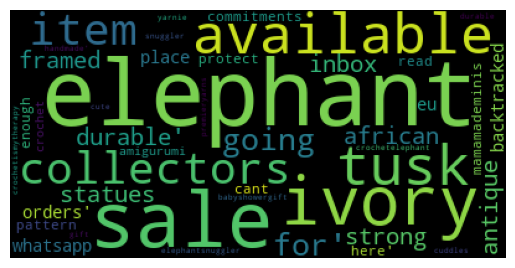

In [8]:
#Visualize common words in the data
from wordcloud import WordCloud
text = clean_tweets['cleaned_tweet'].values 

import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud().generate(str(text))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

<Axes: ylabel='Frequency'>

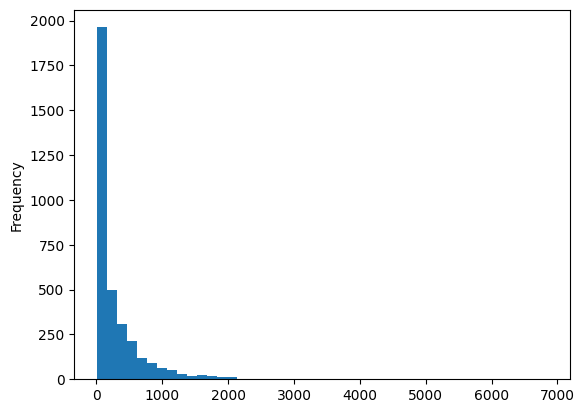

In [9]:
#distribution of tweets length based on the characters
clean_tweets['cleaned_tweet'].str.len().plot.hist(bins=45)

Label
0    2048
1    1376
Name: count, dtype: int64


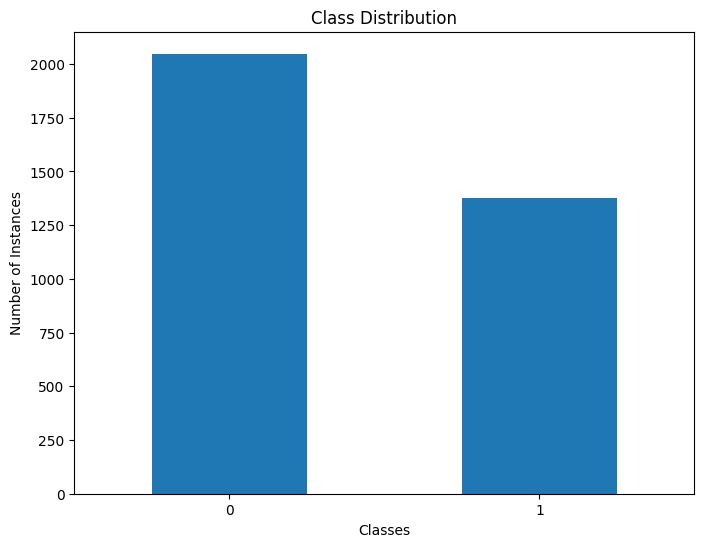

In [10]:
# Counting the frequency of each class
class_counts = clean_tweets['Label'].value_counts()
print(class_counts)
# Visualize the class distribution
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Number of Instances')
plt.xticks(rotation=0)
plt.show()

In [11]:
#Percentage lable count
clean_tweets['Label'].value_counts(normalize=True)

Label
0    0.598131
1    0.401869
Name: proportion, dtype: float64

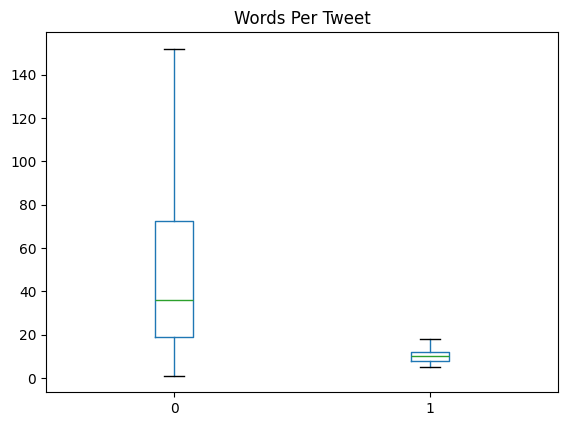

In [12]:
#Checking the words per tweet as distilBERT requires a maximum of 512 tokens
clean_tweets['Words Per Tweet'] = clean_tweets['cleaned_tweet'].str.split().apply(len)
clean_tweets.boxplot('Words Per Tweet', by='Label', grid=False, showfliers=False)
plt.suptitle("")
plt.xlabel("")
plt.show()

In [13]:
clean_tweets = clean_tweets.drop(['Words Per Tweet'], axis=1)
clean_tweets

,Label,cleaned_tweet
2913,1,tusks available for sale for this is durable
3070,1,strong ivory tusk from elephant for sale this ...
2174,1,antique african elephant ivory statues framed ...
2563,1,tusks available for sale for this is african
309,0,relax take it easy and soak in moments with so...
...,...,...
1095,0,truth on world elephant day were here to remin...
1130,0,thanks to the efforts of many the reduction in...
1294,0,the eu has backtracked on its commitments to p...
860,0,i cant get enough of these elephants pattern m...


DATA SPLITTING

In [14]:
from sklearn.model_selection import train_test_split

X = clean_tweets['cleaned_tweet']
y = clean_tweets['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training set into a training and validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

In [15]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(2328,)
(2328,)
(685,)
(685,)


DATA AUGMENTATION

In [16]:
import gensim.downloader as api
import random

# Loading a pre-trained Word2Vec model
wv_model = api.load('word2vec-google-news-300')

def augment_text(text, model, num_replacements=1):
    """
    Augment a given text by replacing some words with their synonyms from the Word2Vec model.
    """
    words = text.split()
    augmented_text = []
    for word in words:
        if word in model and random.random() < 0.2:  # Replace 20% of words
            synonyms = [w for w, s in model.most_similar(word, topn=5) if w != word]
            if synonyms:
                augmented_text.append(random.choice(synonyms))
                num_replacements -= 1
        else:
            augmented_text.append(word)
        if num_replacements == 0:
            break
    return ' '.join(augmented_text)

# Augmenting the X_train set
augmented_X_train = [augment_text(text, wv_model) for text in X_train]


In [17]:
augmented_X_train[:5]

['elephant rhino_horns',
 'as the trophy hunts',
 'historyinmemes cute elephant dad',
 'elephant',
 'elephant jungle_safari']

IMPORTING TRANSFROMER AND SENDING IT TO DEVICE

In [25]:
#from transformers import AutoTokenizer, DistilBertTokenizer, DistilBertForSequenceClassification
from transformers import AutoTokenizer, DistilBertTokenizer, AutoModel
num_labels=2
MAX_LEN = 32
#tokenizer =  DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
#model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased").to(device)
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
model = AutoModel.from_pretrained("distilbert-base-uncased").to(device)

DATA TOKENIZATION

In [26]:
def construct_encodings(training_text, tokenizer, max_len, trucation=True, padding=True):
    return tokenizer(training_text, max_length=max_len, truncation=trucation, padding=padding,return_tensors="pt").to(device)
    
X_train_encodings = construct_encodings(augmented_X_train, tokenizer, max_len=MAX_LEN)
X_val_encodings = construct_encodings(X_val.values.tolist(), tokenizer, max_len=MAX_LEN)
X_test_encodings = construct_encodings(X_test.values.tolist(), tokenizer, max_len=MAX_LEN)

In [27]:
X_train_encodings

{'input_ids': tensor([[  101, 10777, 24091,  ...,     0,     0,     0],
        [  101,  2004,  1996,  ...,     0,     0,     0],
        [  101,  2381,  2378,  ...,     0,     0,     0],
        ...,
        [  101,  2434, 10722,  ...,     0,     0,     0],
        [  101, 10722,  6711,  ...,     0,     0,     0],
        [  101,  2292,  1996,  ...,     0,     0,     0]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]], device='cuda:0')}

EXTRACTING HIDDEN STATES FOR TRAINING A SMALL CLASSIFIER

In [28]:
with torch.no_grad():
  hidden_train = model(**X_train_encodings) 
  hidden_val = model(**X_val_encodings)

#getting only the [CLS] hidden states
cls_train = hidden_train.last_hidden_state[:,0,:]
cls_val = hidden_val.last_hidden_state[:,0,:]

In [97]:
cls_train

tensor([[-3.4004e-01,  3.7633e-02, -9.0217e-02,  ..., -1.4263e-01,
          2.0386e-01,  1.2433e-01],
        [-2.6616e-01, -1.7705e-01,  2.5189e-01,  ..., -1.6334e-01,
          2.3882e-01,  2.8689e-01],
        [-2.4014e-01, -9.9106e-02,  1.9570e-02,  ..., -2.0396e-01,
          4.0812e-01,  3.1582e-01],
        ...,
        [-2.7141e-01, -8.0917e-02, -8.9614e-02,  ..., -1.0215e-01,
          3.1762e-01,  4.0187e-01],
        [-3.8307e-01, -2.2167e-01, -4.7307e-02,  ..., -2.4846e-01,
          2.4579e-02,  2.4694e-01],
        [ 1.5596e-01,  3.6765e-04,  1.9496e-02,  ...,  8.9463e-04,
          2.4347e-01,  2.7108e-01]], device='cuda:0')

In [29]:
# Move X_train_encodings to CPU and extract labels
x_train = cls_train.to("cpu")
y_train = y_train

# Moving cls_val to CPU and extract labels
x_val = cls_val.to("cpu")
#x_val = cls_val[:, :32].to("cpu")
y_val = y_val

# shapes to verify
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

torch.Size([2328, 768]) (2328,) torch.Size([411, 768]) (411,)


TRAINING A RANDOM FOREST WITH HIDDEN STATES AND EVALUATING

In [30]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

# Evaluate on validation set
accuracy = rf.score(x_val, y_val)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.9854014598540146


In [96]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#  parameter grid to search
param_grid = {
    'n_estimators': [10, 20, 30],  #  values for the number of trees
    'max_depth': [None, 5, 10, 15],  #  the maximum depth of the trees
    
}


rf = RandomForestClassifier()

#  the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='f1', cv=5)  

#  grid search
grid_search.fit(x_train, y_train)

#  best model and best hyperparameters
best_rf = grid_search.best_estimator_
best_params = grid_search.best_params_

# best model on the validation set
accuracy = best_rf.score(x_val, y_val)
print("Validation Accuracy with Best Model:", accuracy)
print("Best Hyperparameters:", best_params)


Validation Accuracy with Best Model: 0.9878345498783455
Best Hyperparameters: {'max_depth': None, 'n_estimators': 20}


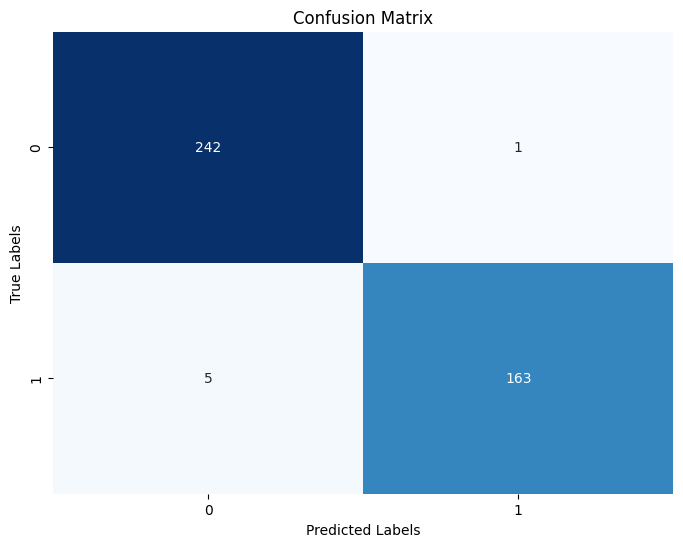

In [31]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and train the RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

# Predict on validation set
y_pred = rf.predict(x_val)

# Compute confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [94]:
f1 = f1_score(y_val, y_pred, average='weighted')  # You can choose the averaging strategy based on your specific use case

print("F1 Score:", f1)

F1 Score: 0.9853731027192338


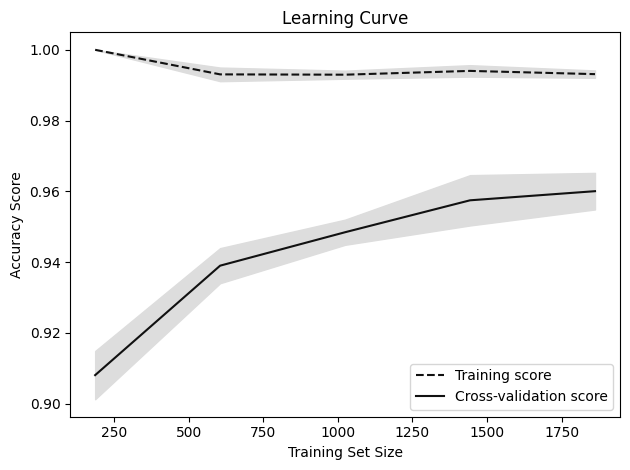

In [61]:
from sklearn.model_selection import learning_curve
# Determining training sizes
train_sizes = np.linspace(0.1, 1.0, 5)

# Calculating learning curve
train_sizes, train_scores, test_scores = learning_curve(rf, x_train, y_train, train_sizes=train_sizes, cv=5)

# Calculating mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculating mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plotting the learning curve
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Drawing bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Creating plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

CONVERTING DATA TO PYTORCH TENSORS FOR DISTILBERT

In [39]:
y_train_tensor = torch.tensor(y_train.values)
y_val_tensor = torch.tensor(y_val.values)
y_test_tensor = torch.tensor(y_test.values)

In [40]:
from torch.utils.data import Dataset

class TextDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Convert to PyTorch Datasets
train_dataset = TextDataset(X_train_encodings, y_train_tensor)
val_dataset = TextDataset(X_val_encodings, y_val_tensor)
test_dataset = TextDataset(X_test_encodings, y_test_tensor)

In [69]:
type(train_dataset)

__main__.TextDataset

FINE TUNNING DISTILBERT

In [42]:
from sklearn.metrics import f1_score, accuracy_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

In [43]:
from transformers import Trainer, TrainingArguments

batch_size = 64
logging_steps = len(train_dataset) // batch_size
model_name = "distilbert-base-uncased"

training_args = TrainingArguments(
    output_dir=model_name,
    num_train_epochs=5,
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    disable_tqdm=False,
    logging_steps=logging_steps,
    log_level="error",
    report_to="none"
)

In [44]:
from transformers import AutoModelForSequenceClassification
#setting number of classes to 2
num_labels = 2
finetuned_model = (AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=num_labels).to(device))

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [45]:
trainer = Trainer(
    model=finetuned_model,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=train_dataset,  # Pass the dictionary directly
    eval_dataset=val_dataset,     # Pass the dictionary directly
    tokenizer=tokenizer,
)

In [46]:
trainer.train()

C:\Users\salij\AppData\Local\Temp\ipykernel_13632\2599462468.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
C:\Users\salij\AppData\Local\Temp\ipykernel_13632\2599462468.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx])


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.408000,0.067094,0.995134,0.995129
2,0.147100,0.043059,0.987835,0.987851
3,0.094700,0.032133,0.987835,0.987851
4,0.078100,0.022676,0.997567,0.997566
5,0.069800,0.022960,0.995134,0.995134


C:\Users\salij\AppData\Local\Temp\ipykernel_13632\2599462468.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
C:\Users\salij\AppData\Local\Temp\ipykernel_13632\2599462468.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx])
C:\Users\salij\AppData\Local\Temp\ipykernel_13632\2599462468.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
C:\U

TrainOutput(global_step=185, training_loss=0.15625689214951283, metrics={'train_runtime': 116.0273, 'train_samples_per_second': 100.321, 'train_steps_per_second': 1.594, 'total_flos': 96370032522240.0, 'train_loss': 0.15625689214951283, 'epoch': 5.0})

In [56]:

preds_output = trainer.predict(test_dataset)

C:\Users\salij\AppData\Local\Temp\ipykernel_13632\2599462468.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
C:\Users\salij\AppData\Local\Temp\ipykernel_13632\2599462468.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx])


In [57]:
preds_output.metrics

{'test_loss': 0.013757252134382725,
 'test_accuracy': 0.9985401459854014,
 'test_f1': 0.998540593493968,
 'test_runtime': 1.186,
 'test_samples_per_second': 577.581,
 'test_steps_per_second': 9.275}

In [58]:
import numpy as np
y_preds = np.argmax(preds_output.predictions, axis=1)

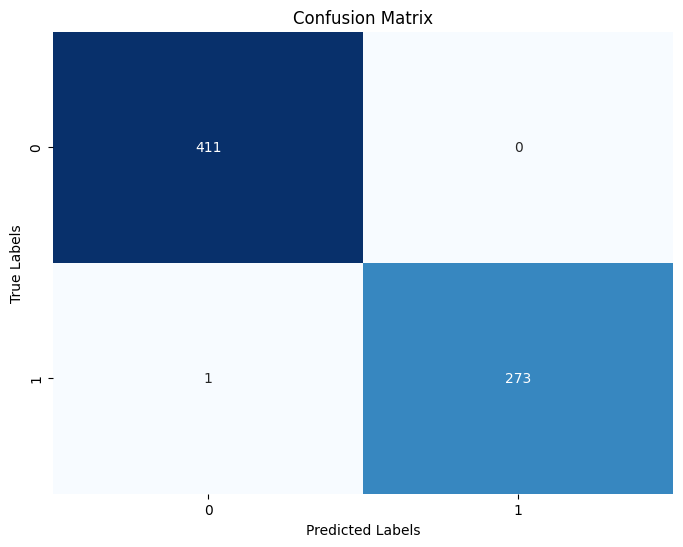

In [59]:
#Plotting confusion matrix for distilBERT
conf_m= confusion_matrix(y_preds, y_test_tensor)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_m, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

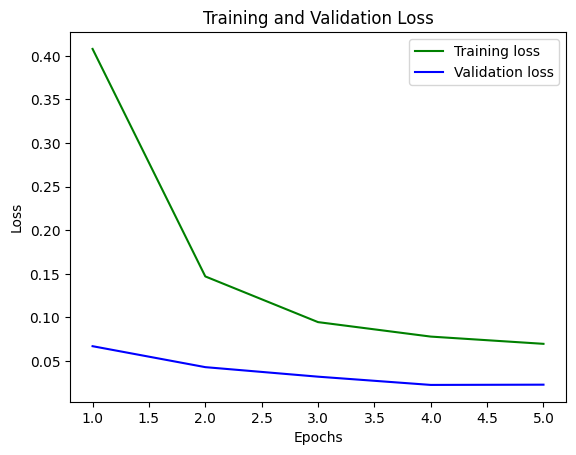

In [63]:
#Extracting loss values
train_loss = [log['loss'] for log in trainer.state.log_history if 'loss' in log]
eval_loss = [log['eval_loss'] for log in trainer.state.log_history if 'eval_loss' in log]

# Creating range of epochs
epochs = range(1, len(train_loss) + 1)

# Plotting training and validation loss
plt.plot(epochs, train_loss, 'g', label='Training loss')
plt.plot(epochs, eval_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

SAVING MODEL

In [67]:
import pickle

In [85]:
#saving the model
with open('model.pkl', 'wb') as f:
    pickle.dump(finetuned_model, f)

